In [49]:
import timeit
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import h5py
import os
%matplotlib notebook

In [50]:
def opentimer(data):
    
    #start = time.time()
    
    infile = open(data)
    #infile = np.loadtxt(data,dtype='float',delimiter=' ')
    
    #end = time.time()
    
    #opentime = end - start
    
    #print "took %s seconds" % (opentime)
    
    return infile

#################################################################################

def nopentimer(data):
    
    #start = time.time()
    
    infile = np.load(data)
    
    #end = time.time()
    
    #nopentime = end - start
    
    #print "took %s seconds" % (nopentime)
    
    return infile

##################################################################################

def mathtimer(openfunc,data):
    
    processtime = 0
    
    startp = time.time()
    
    vals = []
    e = 0
    #print 'opening...'
    
    if openfunc == opentimer:

        for i in openfunc(data):
            nums = i.split()
            for j in range(0,31):
                e = float(nums[j])+float(nums[j+1])
                vals.append(e)
                
    else:
        
        for i in openfunc(data):
            for j in range(0,31):
                e = i[j] + i[j+1]
                vals.append(e)       
            
    #print 'beginning operation...'
    
    endp = time.time()
    
    processtime = endp - startp
    
    #print "took %s seconds" % (processtime)
    return processtime
##################################################################################

def npztimer(openfunc,data):
    
    taken = 0
    vals = []
    #print 'opening...'
    nums = openfunc(data)
    
    #print 'beginning operation...'
    
    start = time.time()
    
    array = nums['arr_0']
        
    for i in array:
        for j in range(0,31):
            e = i[j] + i[j+1]
            vals.append(e)
            
    end = time.time()
    
    taken = end - start
    
    #print 'took %f seconds' % (taken)
    
    return taken

In [51]:
def hdf5timer(File):
    
    dt = 0
    
    st = time.time()
    vals =[]
    with h5py.File(File,'r') as hf:
        data = np.array(hf.get('dset1'))
        for i in data:
            for j in range(0,31):
                asd = i[j] + i[j+1]
                vals.append(asd)
        
    ft = time.time()
    
    dt = ft - st
    
    return dt

In [61]:
txtt = []
npyt = []
npzt = []
npz_ct = []
hdf5t = []

x = [10,100,1000,10000,100000]

txtt.append(mathtimer(opentimer,'10.txt'))
txtt.append(mathtimer(opentimer,'100.txt'))
txtt.append(mathtimer(opentimer,'1000.txt'))
txtt.append(mathtimer(opentimer,'10000.txt'))
txtt.append(mathtimer(opentimer,'100000.txt'))

npyt.append(mathtimer(nopentimer,'10.npy'))
npyt.append(mathtimer(nopentimer,'100.npy'))
npyt.append(mathtimer(nopentimer,'1000.npy'))
npyt.append(mathtimer(nopentimer,'10000.npy'))
npyt.append(mathtimer(nopentimer,'100000.npy'))

npzt.append(npztimer(nopentimer,'10.npz'))
npzt.append(npztimer(nopentimer,'100.npz'))
npzt.append(npztimer(nopentimer,'1000.npz'))
npzt.append(npztimer(nopentimer,'10000.npz'))
npzt.append(npztimer(nopentimer,'100000.npz'))

npz_ct.append(npztimer(nopentimer,'10_c.npz'))
npz_ct.append(npztimer(nopentimer,'100_c.npz'))
npz_ct.append(npztimer(nopentimer,'1000_c.npz'))
npz_ct.append(npztimer(nopentimer,'10000_c.npz'))
npz_ct.append(npztimer(nopentimer,'100000_c.npz'))

hdf5t.append(hdf5timer('10.hdf5'))
hdf5t.append(hdf5timer('100.hdf5'))
hdf5t.append(hdf5timer('1000.hdf5'))
hdf5t.append(hdf5timer('10000.hdf5'))
hdf5t.append(hdf5timer('100000.hdf5'))

<IPython.core.display.Javascript object>


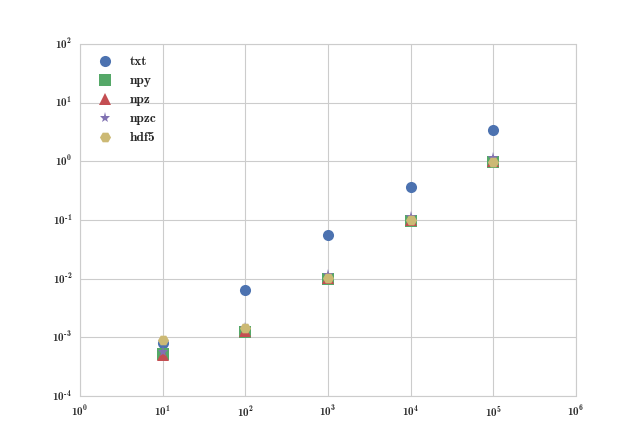

In [67]:
sn.set_style('whitegrid')
sn.set_context('notebook')

plt.plot(x,txtt,'o',markersize=10,label='txt')
plt.plot(x,npyt,'s',markersize=10,label='npy')
plt.plot(x,npzt,'^',markersize=10,label='npz')
plt.plot(x,npz_ct,'*',markersize=10,label='npzc')
plt.plot(x,hdf5t,'H',markersize=10,label='hdf5')

#plt.plot(x, np.poly1d(np.polyfit(x, npz_ct, 1))(x))
#plt.plot(x, np.poly1d(np.polyfit(x, txtt, 1))(x))
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001,100)
plt.xlim(1,1000000)
plt.legend(loc='upper left',fontsize=12)

In [63]:
txts = []
npys = []
npzs = []
npz_cs = []
hdf5s = []

def size(File):
    f = os.path.getsize(File)
    mbf = f/1e6
    return mbf

txts.append(size('10.txt'))
txts.append(size('100.txt'))
txts.append(size('1000.txt'))
txts.append(size('10000.txt'))
txts.append(size('100000.txt'))

npys.append(size('10.npy'))
npys.append(size('100.npy'))
npys.append(size('1000.npy'))
npys.append(size('10000.npy'))
npys.append(size('100000.npy'))

npzs.append(size('10.npz'))
npzs.append(size('100.npz'))
npzs.append(size('1000.npz'))
npzs.append(size('10000.npz'))
npzs.append(size('100000.npz'))

npz_cs.append(size('10_c.npz'))
npz_cs.append(size('100_c.npz'))
npz_cs.append(size('1000_c.npz'))
npz_cs.append(size('10000_c.npz'))
npz_cs.append(size('100000_c.npz'))

hdf5s.append(size('10.hdf5'))
hdf5s.append(size('100.hdf5'))
hdf5s.append(size('1000.hdf5'))
hdf5s.append(size('10000.hdf5'))
hdf5s.append(size('100000.hdf5'))

[0.008, 0.08, 0.8, 8.0, 80.0]


<IPython.core.display.Javascript object>


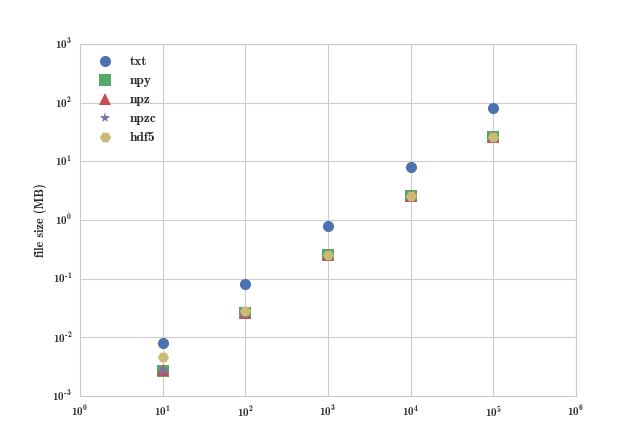

In [70]:
print txts

sn.set_style('whitegrid')
sn.set_context('notebook')

plt.plot(x,txts,'o',markersize=10,label='txt')
plt.plot(x,npys,'s',markersize=10,label='npy')
plt.plot(x,npzs,'^',markersize=10,label='npz')
plt.plot(x,npz_cs,'*',markersize=10,label='npzc')
plt.plot(x,hdf5s,'H',markersize=10,label='hdf5')

#plt.plot(x, np.poly1d(np.polyfit(x, npz_ct, 1))(x))
#plt.plot(x, np.poly1d(np.polyfit(x, txtt, 1))(x))
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.001,1000)
plt.xlim(1,1000000)
plt.legend(loc='upper left',fontsize=12)
plt.ylabel('file size (MB)')


47